In [1]:
# Math Packages
import math
import pandas as pd
import numpy as np

# Plot Packages 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Other Packages 
from datetime import *
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# File path
DATA_FOLDER = "./data/"
META_HEALTH_CARE = "health_metadata.pkl"
REVIEWS_HEALTH_CARE = "health_review.pkl"
HEALTH_CARE = "health_merge.pkl"

**General Analysis**

* What's the most popular categories of health and care?
* How average rating varies between different categories? Distribution of rating 
* Chronologically, how the ratings of health and care products change? And how do people rate? For some interesed category, plot the trend of rating through year
* Can we get the keywords of reviews of each year? Is there any obvious difference?

**Metadata Analysis** 
* Do people love some specific category? What's the differernce in ratings between books of different category? 
* How about the style of reviews of some specific category?  
* What's the role of price? How does price influence costumers' behaviours and books' ratings?


**Data Description**
* What's the most popular categories of health and care?
* How average rating varies between different categories? Distribution of rating 
* Chronologically, how the ratings of health and care products change? And how do people rate? For some interesed category, plot the trend of rating through year
* Price distribution(category,overall)
* Most reviewed categoried 
* Most rated categoried 
* Helpful rate

**Data Analysis**


## General Analysis

### Review 
#### Load data

In [3]:
# Health care review
df_health_review = pd.read_pickle(DATA_FOLDER+ REVIEWS_HEALTH_CARE)
df_health_review.head(8)

,asin,helpful,overall,reviewText,ReviewTime
0,0077614992,"[0, 0]",5,This book was a requirement for a college clas...,2013-02-15
1,0615208479,"[0, 0]",5,This is a great gift for anyone who wants to h...,2008-12-01
2,0615269990,"[0, 0]",5,Very helpful in learning about different disea...,2014-04-06
3,0615269990,"[1, 1]",5,Occam's Razor is an unbelievably intuitive and...,2013-12-04
4,0615269990,"[0, 0]",2,I met the guys from Nerdcore at a medical conf...,2014-04-24
5,0615315860,"[0, 0]",5,"Love this little book, Has allot of great reci...",2013-03-07
6,0615315860,"[0, 0]",5,This is a great simple book for blender bottle...,2013-01-13
7,0615406394,"[0, 0]",5,"You have to be a breast cancer survivor, which...",2013-07-07


#### Rating distribution

View the distribution of rating for the whole review data set

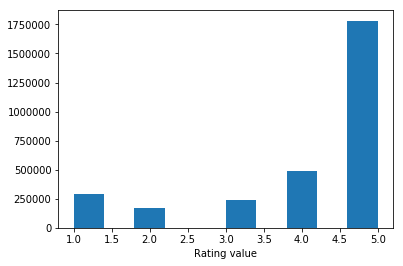

In [4]:
df_health_review.overall.hist(bins =10);
plt.grid(False)
plt.xlabel('Rating value')
plt.show()

```EXPLANATION```: Rating 5.0 is high

------

1. First, groupby column **asin(amazon id)** and aggregate the average value
2. View the distribution of average rating for dataset with uniqe id

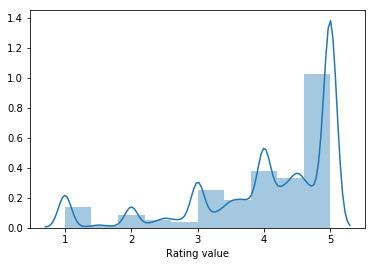

In [5]:
# ratiing average
df_rating_avg = df_health_review.groupby(df_health_review.asin)[['overall']].mean()

# rating distribution
sns.distplot(df_rating_avg,bins = 10)
plt.xlabel('Rating value')
plt.show()

```EXPLANATION```: 

#### Groupby year and get the average rating, good rating ratio,bad rating ratio

In [6]:
# Get the mean and size of rating through 2004-2014 by using groupby year 
df_rating_year_grouped = df_health_review.groupby(df_health_review.ReviewTime.dt.year)['overall']
df_rating_year = df_rating_year_grouped.agg([np.mean,np.size])

# Rename the column mean: avg
df_rating_year.rename({'mean':'avg'},axis='columns',inplace=True)

grouped = df_health_review.groupby(df_health_review.ReviewTime.dt.year)
# Calculate the ratio of Good rating(Rating value > =4)
g = grouped.apply(lambda x: (x[['overall']]>= 4).sum()/x[['overall']].count())
df_rating_year['good_rating_per'] = g['overall']

# Bad rating ratio = 1- Good rating ratio
df_rating_year['bad_rating_per'] = 1- g['overall']

# Filter the number of rating >1000
df_rating_year = df_rating_year[df_rating_year['size']>1200]
df_rating_year

,avg,size,good_rating_per,bad_rating_per
ReviewTime,,,,
2004,3.950674,2595,0.729094,0.270906
2005,3.960867,7155,0.731377,0.268623
2006,4.025686,12458,0.748676,0.251324
2007,4.123946,34757,0.777915,0.222085
2008,4.086907,49570,0.765483,0.234517
2009,4.024734,71116,0.745486,0.254514
2010,4.021525,120416,0.743331,0.256669
2011,4.029847,218313,0.744587,0.255413
2012,4.057568,407486,0.749304,0.250696


#### Average rating and the number of review though year
**Good rating **: Rating value > =4  
**Bad  rating **: Rating value < 4  
Plot the number of reviews and average rating between 2004-2014 for the whole dataset

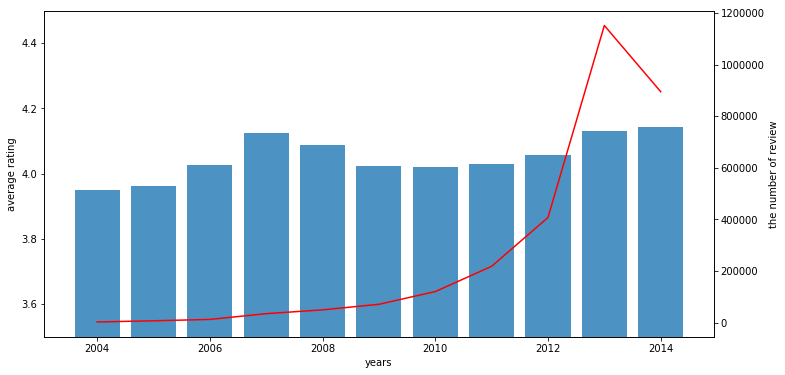

In [7]:
_, ax1 = plt.subplots(figsize = (12,6))
ax1.bar(df_rating_year.index,df_rating_year.avg, alpha=0.8)
ax1.set_ylim(3.5,4.5)
ax1.set_xlabel('years')
ax1.set_ylabel('average rating')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df_rating_year.index,df_rating_year['size'],color ='r')
ax2.set_ylabel('the number of review')
plt.show()

#### Rating distribution

#### Groupby year and get the average rating, good rating ratio,bad rating ratio

In [8]:
# rating through year
df_rating_year_grouped_sports = df_sports_review.groupby(df_sports_review.ReviewTime.dt.year)['overall']

df_rating_year_sports = df_rating_year_grouped_sports.agg([np.mean,np.size])
df_rating_year_sports.rename({'mean':'avg'},axis='columns',inplace=True)

NameError: name 'df_sports_review' is not defined

In [9]:
grouped = df_sports_review.groupby(df_sports_review.ReviewTime.dt.year)
# Good rating >= 4.0
g = grouped.apply(lambda x: (x[['overall']]>= 4).sum()/x[['overall']].count())

df_rating_year_sports['good_rating_per'] = g['overall']
df_rating_year_sports['bad_rating_per'] = 1- g['overall']
# Filter the number of rating >1000
df_rating_year_sports = df_rating_year_sports[df_rating_year_sports['size']>1000]
df_rating_year_sports

NameError: name 'df_sports_review' is not defined

#### Average rating and the number of rating though year

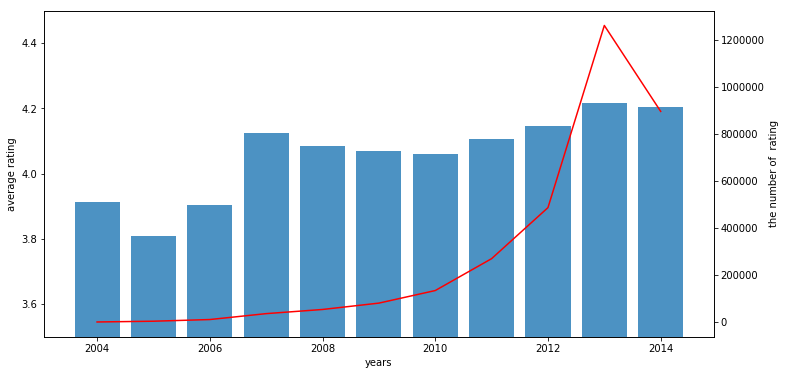

In [16]:
_, ax1 = plt.subplots(figsize = (12,6))
ax1.bar(df_rating_year_sports.index,df_rating_year_sports.avg, alpha=0.8)
ax1.set_ylim(3.5,4.5)
ax1.set_xlabel('years')
ax1.set_ylabel('average rating')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df_rating_year_sports.index,df_rating_year_sports['size'],color ='r')
ax2.set_ylabel('the number of  rating')
plt.show()

#### Rating ratio though year

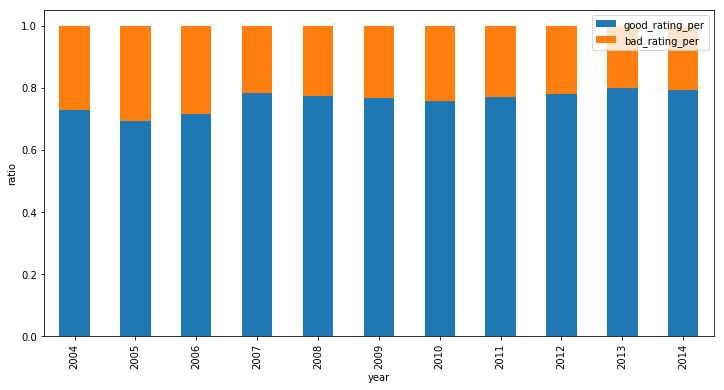

In [17]:
df_rates  = df_rating_year_sports.iloc[:,[2,3]]
_, ax1 = plt.subplots(figsize = (12,6))
df_rates.plot.bar(stacked=True,ax=ax1)
ax1.set_xlabel('year')
ax1.set_ylabel('ratio')
plt.show()

#### Seasonal review analysis

- As we know from previous part, the number of reviews grows with the years rapidly. However, we hope to dive into the relationship between review number and time. In this part, we apply **seasonal decomposition** method to the observed time series and analyze whether there is a seasonal changing pattern of review number under the yearly growth.

In [13]:
# Create a new DataFrame for review time and reveiw amount
df_reviewtime_reveiwnum = df_health_review.groupby('ReviewTime').count()[['asin']]
df_reviewtime_reveiwnum.columns = ['ReviewNumber']
df_reviewtime_reveiwnum = df_reviewtime_reveiwnum.reset_index()

- Since the ammount of review number is too small before 2004 year and the data set seems not to contain the whole sales data in 2014, we only treat the 2004-2013 interval.

In [14]:
flag = df_reviewtime_reveiwnum['ReviewTime'].map(lambda x: (x.year>2003)&((x.year<2014)))
df_reviewtime_reveiwnum_subset = df_reviewtime_reveiwnum.loc[flag]
df_reviewtime_reveiwnum_subset.head()

,ReviewTime,ReviewNumber
832,2004-01-01,14
833,2004-01-02,6
834,2004-01-03,5
835,2004-01-04,10
836,2004-01-05,14


In [11]:
def plot_seasonal_decomposition(df_reviewtime_reveiwnum_subset, seasonal_decomposition_list, title_list, ylabel_list):
    '''
         Plot seasonal decomposition figures: 
         Initial Time Series Figure, Trend Component Figure, Seasonal Component Figure.
    '''
    for i in range(3):
        plt.subplot(3,1,i + 1)
        plt.plot(df_reviewtime_reveiwnum_subset.ReviewTime, seasonal_decomposition_list[i])
        plt.xlabel('Date')
        plt.ylabel(ylabel_list[i])
        plt.title(title_list[i])
        plt.legend(['Data Change Line'])
    plt.show()

- The [decomposition of time series](https://en.wikipedia.org/wiki/Decomposition_of_time_series) is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns:
$$
y_t = T_t + C_t + S_t + I_t
$$<br>
$T_t$: the trend component at time $t$. &nbsp;&nbsp;&nbsp;&nbsp; $C_t$: the cyclical component at time $t$.&nbsp;&nbsp;&nbsp;&nbsp;
$S_t$: the seasonal component at time $t$.&nbsp;&nbsp;&nbsp;&nbsp;$I_t$: the irregular component at time $t$.<br>

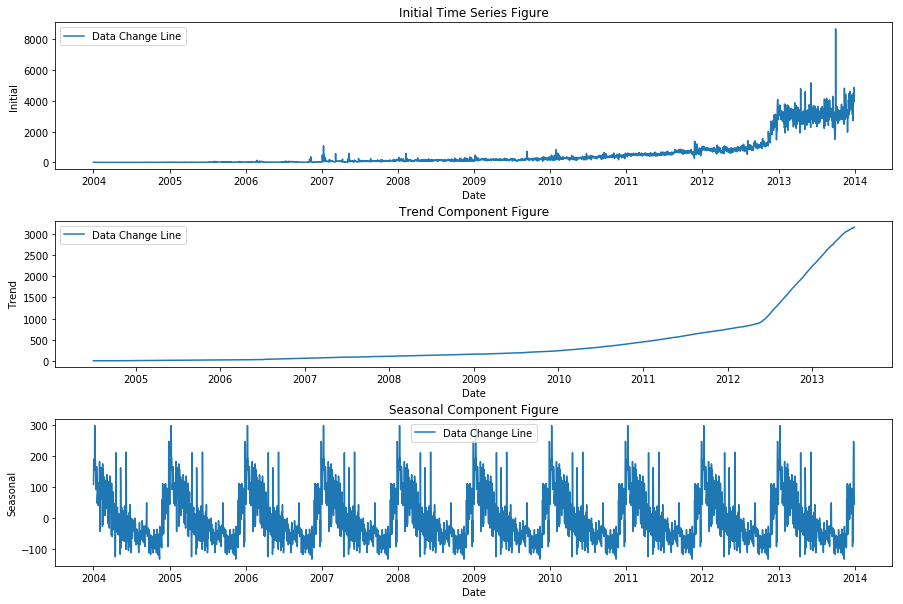

In [12]:
seasonal_decomposition = seasonal_decompose(df_reviewtime_reveiwnum_subset.ReviewNumber,freq=365)

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.35)
title_list = ['Initial Time Series Figure', 'Trend Component Figure', 'Seasonal Component Figure']
ylabel_list = ['Initial', 'Trend', 'Seasonal']

seasonal_decomposition_list = [seasonal_decomposition.observed, seasonal_decomposition.trend, 
                              seasonal_decomposition.seasonal, seasonal_decomposition.resid]

plot_seasonal_decomposition(df_reviewtime_reveiwnum_subset, seasonal_decomposition_list, title_list, ylabel_list)

⬆From the figures above, we know that:
1. There is a remarkable increasing trend of review number and the growth rate is becoming more and more faster with the years.
2. There exists a yearly seasonal trend, which reaches its peaks around January and September and drops to its lowest point around June.

###  Metadata

#### Brand

In [4]:
health_care_meta = pd.read_pickle(DATA_FOLDER + META_HEALTH_CARE)

In [46]:
health_care_meta['brand'].isnull().value_counts()

True     138121
False    124196
Name: brand, dtype: int64

⬆ As is shown above, the number of 'nan' value in brand columns exceed 50%. This result may because some products on Amazon are sold by individual or some brands are not popular enough to group the products into their brand. If we just analyse the rest of data, it will have large bias.Therefore, we decide not to do any analysis what influence brand brought to and the co-relationship between brand and other features.

#### SalesRank

In [50]:
health_care_meta['salesRank'].isnull().value_counts()

False    246999
True      15318
Name: salesRank, dtype: int64

⬆ As is shown above, 'nan' value in salesrank just occupies very small part, so we can do deep analysis on this feature.

As we notice that in the salesrank columns, the ranks of some products don't belong to the 'Health & Personal Care' category (**shown below**). Therefore, in this part, we want to get the counts of each category in the salerank and calculate the proportion of the categories that we're interested and also plot the distribution of the categories.

In [8]:
health_care_meta.iloc[2]

title                                             Occam's Razor
related       {'also_bought': ['1935660152', '0071743979', '...
salesRank                              {'Toys & Games': 110575}
categories    [[Health & Personal Care, Personal Care, Shavi...
price                                                     34.99
brand                                                       NaN
Name: 0615269990, dtype: object

We also notice that the values in the salesrank are not only typical dictionary format and 'nan' value but also many empty dictionary (which is '{}'). This type of values will be converted into 'nan'.

**Main Function**:
- `count_abnormal`: to get the counts of abnormal data, i.e. empty dictionary in this case. ('nan' is actually in float type,so checking data if it is float means checking if it is 'nan')
- `deal_emptydict`: to convert empty dictionary into 'nan' value.
- `count_salerank`: to count each category shown in salesrank.
- `select_salerank`: to select category that we want from data.

In [52]:
def count_abnormal(meta_df):
    """
    count the number of data which contains empty dictionary.

    Parameter:
        meta_df (pandas.dataframe): dataframe that need to process
        
    Return:
        null
    """
    # Initial count
    null_dict_count,notfloat_count=0,0
    for ind,salerank in enumerate(meta_df['salesRank'].values):
        # for dictionary
        if(type(salerank).__name__=='dict'):
            # for empty dictionary
            if(len(salerank)==0):
#                 print("Len(salerank)==0:{s}".format(s=salerank))
                null_dict_count += 1
        # for 'nan' value
        elif((type(salerank).__name__!='float')): 
#             print("float type:{s},type:{t}".format(s=salerank,t=type(salerank).__name__))
            notfloat_count +=1
    # print out
    print("The counts of empty dictionary: " + str(null_dict_count))
    print("The counts of figures which is not float and not dictionary: " + str(notfloat_count))

In [53]:
def deal_emptydict(meta_df):
    """
    Convert empty dictionary value into 'nan'
    
    Parameter:
        meta_df (pandas.dataframe): dataframe that need to process
    
    Return:
        null
    """
    for ind,salerank in enumerate(meta_df['salesRank'].values):
        if(type(salerank).__name__=='dict'):
            if(len(salerank)==0):
                meta_df['salesRank'].values[ind] = np.nan

In [54]:
def count_salerank(meta_df):
    """
    Count the number of category shown in salesrank.
    
    Parameter:
        meta_df (pandas.dataframe): dataframe that need to process
        
    Return:
        sale_cat (dict): dictionary contains categories' name and their counts
    """
    sale_cat={}
    for ind,salerank in enumerate(meta_df['salesRank'].values):
        # for 'nan' value
        if (type(salerank).__name__=='float'):
            if (math.isnan(salerank)):
                if('NAN' in sale_cat):
                    sale_cat['NAN'] +=1
                else:
                    sale_cat['NAN'] = 1
            else:
                print(salerank)
                break
        # for dictionary
        elif(type(salerank).__name__=='dict'):
            # get key
            key = list(salerank.keys())[0]
            # check if sale_cat contains this key
            if(key in sale_cat):
                sale_cat[key] +=1
            else:
                sale_cat[key] = 1
        else:
            print(salerank)
            break
    return sale_cat

In [55]:
def select_salerank(meta_df,catname):
    """
    Select data that belongs to right category in salesrank.
    
    Parameter:
        meta_df (pandas.dataframe): dataframe that need to process
        catname (string): selected category's name
        
    Return:
        array of data's index
    """
    rowlist=[]
    for i in range(len(meta_df)):
        if(type(meta_df.iloc[i]['salesRank']).__name__=='dict'):
            # Get key
            key = list(meta_df.iloc[i]['salesRank'].keys())[0]
            if (key ==catname):
                # find index
                idx = (meta_df.iloc[[i]]).index.values[0]
                rowlist.append(idx)
    return np.asarray(rowlist)

In [56]:
# show the number of data with empty dictionary value
count_abnormal(health_care_meta)

The counts of empty dictionary: 470
The counts of figures which is not float and not dictionary: 0


In [60]:
# process abnormal data
deal_emptydict(health_care_meta)
count_abnormal(health_care_meta)

The counts of empty dictionary: 0
The counts of figures which is not float and not dictionary: 0


Count categories in salerank and show.

In [59]:
hc_countcatsale = count_salerank(health_care_meta)
hc_countcatsale

{'Arts, Crafts & Sewing': 849,
 'Automotive': 44,
 'Baby': 61,
 'Beauty': 15209,
 'Books': 1,
 'Camera &amp; Photo': 58,
 'Cell Phones & Accessories': 1,
 'Clothing': 2788,
 'Computers & Accessories': 5,
 'Electronics': 667,
 'Grocery & Gourmet Food': 96,
 'Health & Personal Care': 193734,
 'Home &amp; Kitchen': 12447,
 'Home Improvement': 252,
 'Industrial & Scientific': 4111,
 'Jewelry': 433,
 'Kitchen & Dining': 5363,
 'Movies & TV': 5,
 'Music': 15,
 'Musical Instruments': 60,
 'NAN': 15788,
 'Office Products': 61,
 'Patio, Lawn & Garden': 665,
 'Pet Supplies': 765,
 'Shoes': 689,
 'Software': 18,
 'Sports &amp; Outdoors': 6129,
 'Toys & Games': 1939,
 'Video Games': 4,
 'Watches': 60}

Plot to see the distribution of each category.

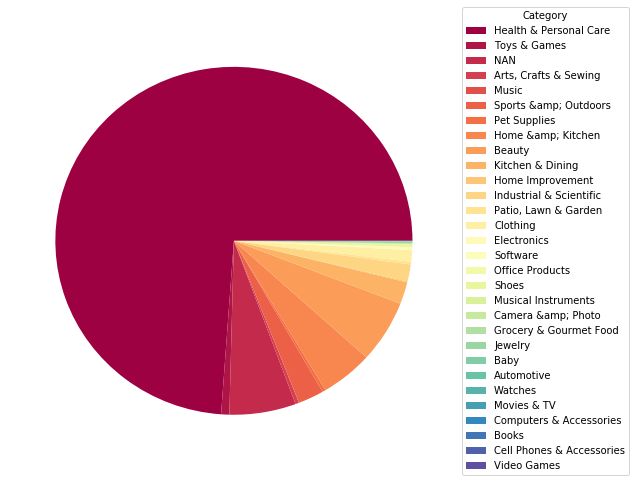

In [61]:
# get categories' name
health_cat = list(hc_countcatsale.keys())
# get counts
health_salerankcount = list(hc_countcatsale.values())

# select color for plot
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, len(health_cat))]

fig,ax= plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(health_salerankcount,colors=colors)

ax.legend(wedges, health_cat,
          title="Category",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

⬆ As the pie chart shown above, it is obvious that the 'Health & Personal Care' category occupies the largest section in this data-set while each of the others just represented in small parts.

We calculate the percentage of 'Health & Personal Care' category to show more clearly.

In [63]:
print("The proportion of products in the corresponding category's salerank: {p:.3f}%"
     .format(p=hc_countcatsale['Health & Personal Care']*100/len(health_care_meta)))

The proportion of products in the corresponding category's salerank: 73.855%


⬆ Conclusion can be drawn that we can analysis the influence brought by salesrank afterwards or the co-relationship between salesrank and other feature.

Select row with interested category in salesrank.

In [64]:
# Select the index of data which we are interested for later analysis
hc_row = select_salerank(health_care_meta,'Health & Personal Care')
#Check if all the desired data is selected
len(hc_row)

193734

In [ ]:
health_valid_salerank = health_care_meta.loc[hc_row]

###  Price

For price, we calculate the number of data with 0 value first and then view its statistic to analyse.

In [73]:
print("The proportion of 0 price in Health & Care is {p:.3f}%".
      format(p=len(health_care_meta[health_care_meta['price']==0])*100/len(health_care_meta)))

The proportion of 0 price in Health & Care is 25.462%


⬆ The percentage of 'nan' is not too large and we can consider to make some analysis on this feature.

In [75]:
# View the statistic of price.
health_valid_price = health_care_meta[health_care_meta['price']!=0]
health_valid_price.describe()

,price
count,195526.000000
mean,28.602098
std,46.342271
min,0.010000
25%,9.250000
50%,17.000000
75%,30.980000
max,999.990000


⬆ From the minimum and maximum of price, we can know that the valid price in health&care range from 0.01 to 999.99. Actually, We also analysed the Sports&Outdoors data-set (but decided not to use it for the reason shown in README.md), which is shown below and shows that the range of price is the same as the Health&Care's one. <br/>
<img src="sports_price.jpg" alt="sports_price" width="500" hight="200"/><br/>
Furthermore, since we have filter the 0 value with which we replace 'nan', and there is no item with 0 price in reality, we can make an assumption that the price of original data-set just accept 0.01 to 999.99 dollars and the rest,the original 'nan' value are actually larger than 999.99 or the price has been normalized between 0 and 999.99 but some data are missed in this process and thus became 'nan'.

Plot the distribution of price in log-log scale.

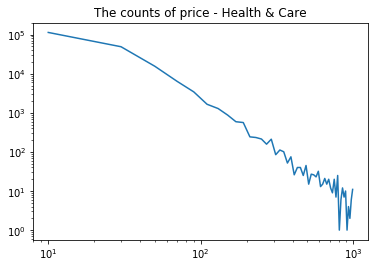

In [76]:
count_log, bin_edges =np.histogram(health_valid_price['price'],bins=50)
# middle points of bins
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
plt.loglog(bin_centers,count_log,'-')
plt.title("The counts of price - Health & Care")
plt.show()

⬆ From the plot, it is clear that it shows in power-law style and most of products in Health&Care are in low price while the products with high price are extremely few. This result fits the reality as we know most of the products are cheaper online because they are tough enough to ship and many people prefer to buy online because of the low price. However, many expensive products are usually more available in the physical store.

###  Helpful

In [81]:
health_helpszero_count = 0
for helps in df_health_review['helpful'].values:
    if (helps[1]==0):
        health_helpszero_count += 1

print("The count of 0 helpfulness voting is: " + str(health_helpszero_count))

The count of 0 helpfulness voting is: 1613817


In [83]:
print("The proportion of 0 helpfulness voting is : {p:.3f}%".format(p=health_helpszero_count*100 / len(df_health_review['helpful'].values)))

The proportion of 0 helpfulness voting is : 54.279%


⬆ As shown above, the percentage of 0 helpfulness is so high, which means that most people in Amazon do not vote review because they do not have this habit or the review is useless for them. We cannot draw a conclusion on which assumption is right, so we will not do any analysis on this feature afterwards.

### Merge metadata and review data 

In [153]:
df_health_meta = health_care_meta.copy()
df_merge_health = df_health_review.merge(df_health_meta, how ='inner', left_on='asin',right_index=True)
df_merge_health.to_pickle(DATA_FOLDER + HEALTH_CARE)

## Specific Analysis

### Health merge

#### Load the dataset

In [91]:
df_health_merge_review = pd.read_pickle(DATA_FOLDER + HEALTH_CARE)
df_health_merge_review.head(3)

,asin,helpful,overall,reviewText,ReviewTime,title,related,salesRank,categories,price,brand
0,0077614992,"[0, 0]",5,This book was a requirement for a college clas...,2013-02-15,Principles of Mgmt + Oper-CSUF Custom C,"{'also_bought': ['0471730726', '0132834871', '...",{'Health & Personal Care': 168429},[[Health & Personal Care]],0.00,NaN
1,0615208479,"[0, 0]",5,This is a great gift for anyone who wants to h...,2008-12-01,Brain Fitness Exercises Software,NaN,{'Health & Personal Care': 1346973},"[[Health & Personal Care, Personal Care]]",0.00,NaN
2,0615269990,"[0, 0]",5,Very helpful in learning about different disea...,2014-04-06,Occam's Razor,"{'also_bought': ['1935660152', '0071743979', '...",{'Toys & Games': 110575},"[[Health & Personal Care, Personal Care, Shavi...",34.99,NaN


#### Split the category into several **sub-categories**.  

For example, Split [ ['Health & Personal Care',
  'Personal Care',
  'Shaving & Hair Removal',
  'Manual Shaving'] ] into 4 class  
1st category is : 'Health & Personal Care'  
2nd category is : 'Personal Care'  
3rd category is : 'Shaving & Hair Removal'  
4th category is : 'Manual Shaving'

In [92]:
df_health_merge_review.categories[2]

[['Health & Personal Care',
  'Personal Care',
  'Shaving & Hair Removal',
  'Manual Shaving']]

In [93]:
# split the category into several sub-categories
health_cat = df_health_merge_review.categories.apply(lambda x : x[0]).values.tolist()
df_health_category = pd.DataFrame(health_cat)
df_health_category.columns = ['1st','2nd','3rd','4th','5th','6th','7th']
df_health_category.head()

,1st,2nd,3rd,4th,5th,6th,7th
0,Health & Personal Care,None,None,None,None,None,None
1,Health & Personal Care,Personal Care,None,None,None,None,None
2,Health & Personal Care,Personal Care,Shaving & Hair Removal,Manual Shaving,None,None,None
3,Health & Personal Care,Personal Care,Shaving & Hair Removal,Manual Shaving,None,None,None
4,Health & Personal Care,Personal Care,Shaving & Hair Removal,Manual Shaving,None,None,None


Since the 1st sub-categories always is ```Health & Personal Care```, we would like to analyze the 2nd sub-categories, and find the average rating and review amount though years based on this.

####  Missing rate of 2nd sub-categories

First, we calcalate the missing rate of 2nd sub-categories. If the missing rate is small we can ignore it since it will have not influnce to out analysis.

In [94]:
# None value rate 
missing_2nd = df_health_category[df_health_category.iloc[:,1].isnull()]['1st'].count()/df_health_category.shape[0]
print( 'Missing rate of 2nd sub-categories is {:.2f}%'.format(missing_2nd*100))

Missing rate of 2nd sub-categories is 2.80%


In [95]:
df_health_category['asin'] = df_health_merge_review.asin
df_health_category['overall'] = df_health_merge_review.overall
df_health_category['time'] = df_health_merge_review.ReviewTime

```Groupby``` the 2nd sub-categories and calculate the average rating and review amount

In [96]:
rating_avg = df_health_category.groupby('2nd')[['overall']].mean().sort_values('overall',ascending = False)
review_amount = df_health_category.groupby('2nd')[['overall']].count().sort_values('overall',ascending = False)

#### Average rating score for each category

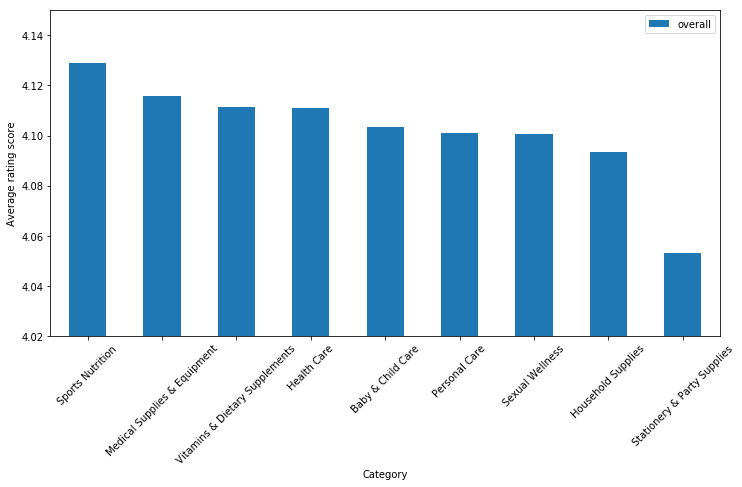

In [97]:
_, ax1 = plt.subplots(figsize = (12,6))
rating_avg.plot.bar(ax=ax1,rot=45)
ax1.set_xlabel('Category')
ax1.set_ylabel('Average rating score')
ax1.set_ylim(4.02,4.15)
plt.show()

#### Review amount for each category

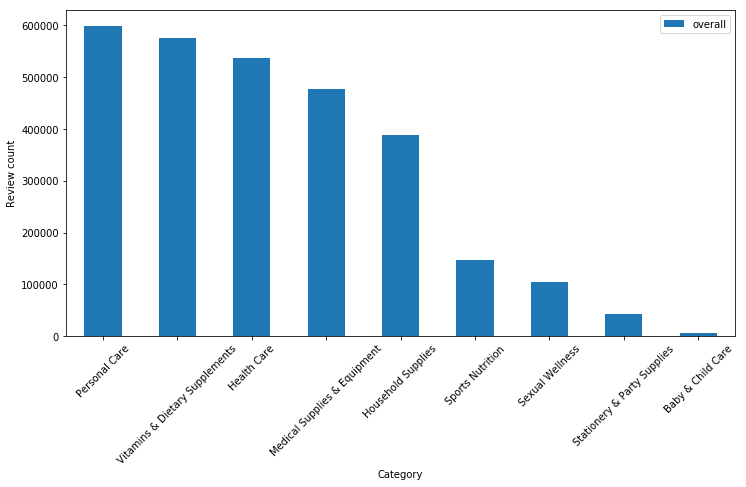

In [98]:
_, ax1 = plt.subplots(figsize = (12,6))
review_amount.plot.bar(ax=ax1,rot=45)
ax1.set_xlabel('Category')
ax1.set_ylabel('Review count')
plt.show()

#### Rating trend of interested category though years

In [99]:
def rating_average_trend(df,list_category_name):
    
    '''Input: 
       df : a dataframe
       list_category_name : A\a list of category names
       
       Output: 
       The line plot of rating trend between 2004-2014 for selected categories'''
    
    _, ax1 = plt.subplots(figsize = (12,8))
    
    for cat_name in list_category_name:
        intersted_category = df[df['2nd'] == cat_name]
        inter = intersted_category.groupby(intersted_category.time.dt.year)[['overall']].mean()
        inter = inter.loc[inter.index>2003]
        inter.index = inter.index.astype('int')
        inter.loc[inter.index>2003].plot(ax=ax1)
    
    ax1.set_ylim(2.0,5)
    ax1.legend(list_category_name)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average rating')
    plt.show()

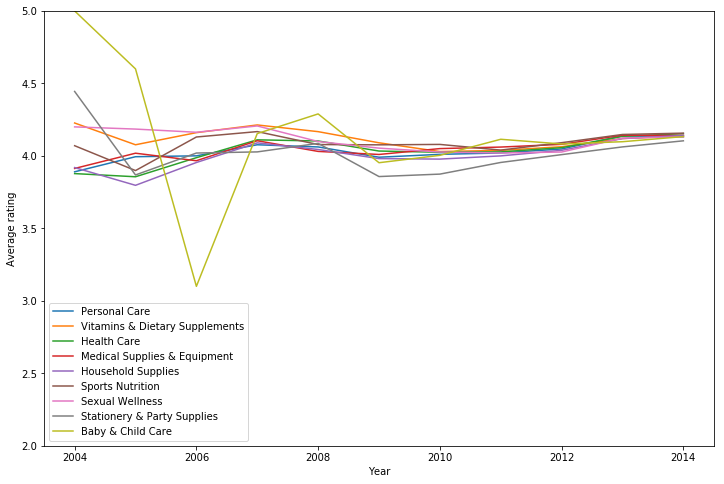

In [100]:
rating_average_trend(df_health_category,review_amount.index.values.tolist())

#### Review amount trend  of interested categories trend though years

In [102]:
def review_amount_trend(df, list_category_name):
    
    ''''Input: 
       df : a dataframe
       list_category_name : a list of category names
       
       Output: 
       The line plot of review amount trend between 2004-2014 for selected categories'''
    
    _, ax1 = plt.subplots(figsize = (12,8))
    
    for cat_name in list_category_name:
        intersted_category = df[df['2nd'] == cat_name]
        inter = intersted_category.groupby(intersted_category.time.dt.year)[['overall']].count()
        inter = inter.loc[inter.index>2003]
        inter.index = inter.index.astype('int')
        inter.loc[inter.index>2003].plot(ax=ax1)
    
    ax1.legend(list_category_name)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Review amount ')
    plt.show()

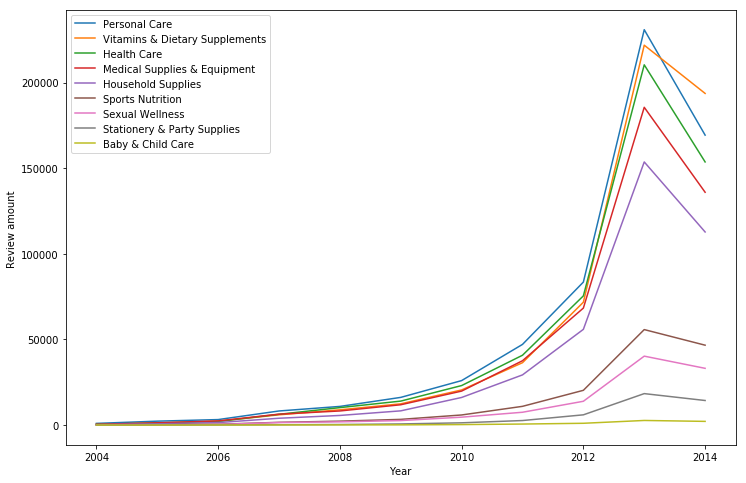

In [103]:
review_amount_trend(df_health_category,review_amount.index.values.tolist())

----------

### Correlation analysis

- To some extent, the review amount can reflect popularity of the product among people and to what extent people are concerned about health product nowadays. In this part, we analyze the **correlation between review amount and price** and the **correlation between review amount and SalesRank** to see whether the price and SalesRank have a linear impact on review amount.  

In [15]:
# Take the 'price' data from meta
df_health_meta = health_care_meta.copy()
df_health_meta_price = df_health_meta.loc[df_health_meta['price']!=0][['price']]
# Create a new DataFrame for review amount and price 
df_health_review_count = df_health_review.groupby('asin').count()
df_health_review_count = df_health_review_count.iloc[:, [0]]
df_health_review_count.columns = ['review_count']
df_health_count_price = pd.merge(df_health_meta_price, df_health_review_count, left_index=True, right_index=True)

NameError: name 'health_care_meta' is not defined

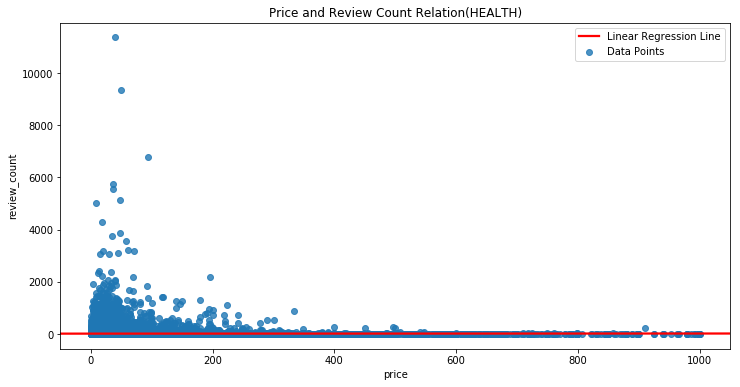

In [147]:
# Plot the scatter figure to see the relationship
plt.figure(figsize=(12, 6))
sns.regplot('price', 'review_count', data=df_health_count_price, line_kws={'color':'r'})
plt.title('Price and Review Count Relation(HEALTH)')
plt.legend(('Linear Regression Line', 'Data Points'))
plt.show()

In [148]:
# Compute the pearson correlation between price and review amount
pearson_corr_health = df_health_count_price.corr()
pearson_corr_health

,price,review_count
price,1.000000,0.002674
review_count,0.002674,1.000000


⬆From the figure and correlation matrix above, we know that:
1. Health and Personal Care product with lower price has a higher review amount, which means cheaper Health and Personal Care product are more popular among people and people are not willing to buy health product very expensive.
2. The correlation between price and review amount is only 0.002674 and linear regression line can not fit the whole data at all, which means price and review amount have a very bad linear relationship.

In [149]:
# Create a new DataFrame for review amount and salesRank 
df_health_meta_salesRank_health = health_valid_salerank[['salesRank']]
df_health_meta_salesRank_health = pd.DataFrame(df_health_meta_salesRank_health.salesRank.map(lambda x: x['Health & Personal Care']))
df_count_rank_health = pd.merge(df_health_meta_salesRank_health, df_health_review_count, left_index=True, right_index=True)

,salesRank,review_count
asin,,
0077614992,168429,1
0615208479,1346973,1
0615315860,254068,2


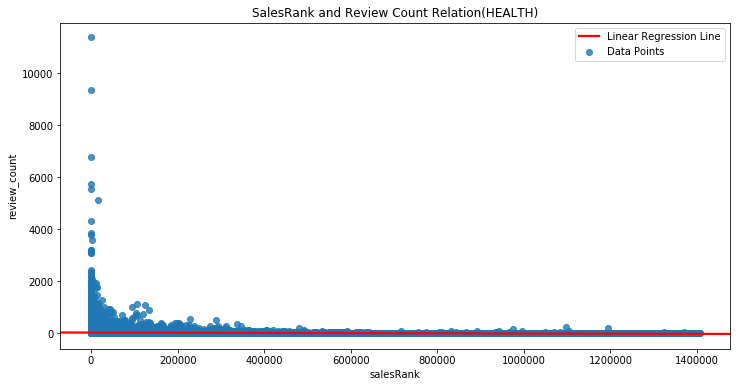

In [152]:
# Plot the scatter figure to see the relationship
plt.figure(figsize=(12, 6))
sns.regplot('salesRank', 'review_count', data=df_count_rank_health, line_kws={'color':'r'})
plt.title('SalesRank and Review Count Relation(HEALTH)')
plt.legend(('Linear Regression Line', 'Data Points'))
plt.show()

In [150]:
# Compute the pearson correlation between price and review amount
pearson_corr_health = df_count_rank_health.corr()
pearson_corr_health

,salesRank,review_count
salesRank,1.000000,-0.644069
review_count,-0.644069,1.000000


⬆From the figure and correlation matrix above, we know that:
1. Health and Personal Care product with higher salesRank has a higher review amount, which means people tend to buy Health and Personal Care product that is widely used and has been bought by a lot of other consumers.
2. The correlation between salesRank and review amount is only -0.159231 and linear regression line also can not fit the whole data well, which means salesRank and review amount do not have a good linear relationship.